In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

print(np.__version__, cv2.__version__)


2.2.5 4.11.0


In [5]:
from numpy import random as r
>>> I = r.rand(256,256)

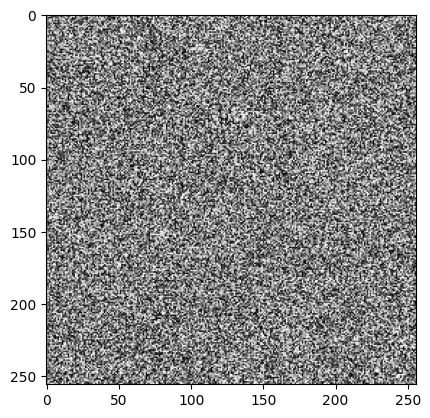

In [7]:
from matplotlib import pyplot as p
>>> I = r.rand(256,256)
>>> p.imshow(I, cmap='gray')
>>> p.show()